Homework 6

Andres Davila

Panther ID: 6292764

Alfonso Rodriguez

ECO 4421

March 28, 2023

In [60]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Question 1

## Q1a.

In [66]:
link = 'https://raw.githubusercontent.com/AlR0d/courses/main/4421/utown.csv'
clo = pd.read_csv(link)
clo
clo['price'] = clo['price']*1000
clo['sqft'] = clo['sqft']*100
clo

,price,sqft,age,utown,pool,fplace
0,205452.0,2346.0,6,0,0,1
1,185328.0,2003.0,5,0,0,1
2,248422.0,2777.0,6,0,0,0
3,154690.0,2017.0,1,0,0,0
4,221801.0,2645.0,0,0,0,1
...,...,...,...,...,...,...
995,257195.0,2284.0,4,1,0,0
996,338295.0,3000.0,11,1,0,1
997,263526.0,2399.0,6,1,0,0
998,300728.0,2874.0,9,1,0,0


$$
price = {\beta}_{0} + {\beta}_{1}sqft + {\beta}_{2}utown + e 
$$

The base group are the homes that are not near the university, indicating as ${\beta}_{0}$ as the intercept for homes far from the university.

## Q1b.

In [199]:
clo['close'] = clo['utown'].replace({0: 'Near', 1: 'Far'})
clo

,price,sqft,age,utown,pool,fplace,Wtown,Wtown_sqft,lnprice,lnsqft,lnage,lnpool,lnfplace,lnWtown_sqft,lnutown,Far,Near,close
0,205452.0,2346.0,6,NaN,0,1,-1,-2346.0,12.232968,7.760467,1.791759,NaN,0.0,NaN,NaN,0,1,NaN
1,185328.0,2003.0,5,NaN,0,1,-1,-2003.0,12.129883,7.602401,1.609438,NaN,0.0,NaN,NaN,0,1,NaN
2,248422.0,2777.0,6,NaN,0,0,-1,-2777.0,12.422884,7.929126,1.791759,NaN,NaN,NaN,NaN,0,1,NaN
3,154690.0,2017.0,1,NaN,0,0,-1,-2017.0,11.949178,7.609367,0.000000,NaN,NaN,NaN,NaN,0,1,NaN
4,221801.0,2645.0,0,NaN,0,1,-1,-2645.0,12.309536,7.880426,NaN,NaN,0.0,NaN,NaN,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,257195.0,2284.0,4,0.0,0,0,1,2284.0,12.457590,7.733684,1.386294,NaN,NaN,7.733684,NaN,1,0,Near
996,338295.0,3000.0,11,0.0,0,1,1,3000.0,12.731674,8.006368,2.397895,NaN,0.0,8.006368,NaN,1,0,Near
997,263526.0,2399.0,6,0.0,0,0,1,2399.0,12.481907,7.782807,1.791759,NaN,NaN,7.782807,NaN,1,0,Near
998,300728.0,2874.0,9,0.0,0,0,1,2874.0,12.613961,7.963460,2.197225,NaN,NaN,7.963460,NaN,1,0,Near


In [198]:
clo = pd.concat([clo, dummy_vars], axis=1)
clo

,price,sqft,age,utown,pool,fplace,Wtown,Wtown_sqft,lnprice,lnsqft,lnage,lnpool,lnfplace,lnWtown_sqft,lnutown,Far,Near
0,205452.0,2346.0,6,NaN,0,1,-1,-2346.0,12.232968,7.760467,1.791759,NaN,0.0,NaN,NaN,0,1
1,185328.0,2003.0,5,NaN,0,1,-1,-2003.0,12.129883,7.602401,1.609438,NaN,0.0,NaN,NaN,0,1
2,248422.0,2777.0,6,NaN,0,0,-1,-2777.0,12.422884,7.929126,1.791759,NaN,NaN,NaN,NaN,0,1
3,154690.0,2017.0,1,NaN,0,0,-1,-2017.0,11.949178,7.609367,0.000000,NaN,NaN,NaN,NaN,0,1
4,221801.0,2645.0,0,NaN,0,1,-1,-2645.0,12.309536,7.880426,NaN,NaN,0.0,NaN,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,257195.0,2284.0,4,0.0,0,0,1,2284.0,12.457590,7.733684,1.386294,NaN,NaN,7.733684,NaN,1,0
996,338295.0,3000.0,11,0.0,0,1,1,3000.0,12.731674,8.006368,2.397895,NaN,0.0,8.006368,NaN,1,0
997,263526.0,2399.0,6,0.0,0,0,1,2399.0,12.481907,7.782807,1.791759,NaN,NaN,7.782807,NaN,1,0
998,300728.0,2874.0,9,0.0,0,0,1,2874.0,12.613961,7.963460,2.197225,NaN,NaN,7.963460,NaN,1,0


In [67]:
base_group = smf.ols('price ~ sqft + utown', data = clo).fit()
print(base_group.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.865     
Dependent Variable: price            AIC:                22140.9413
Date:               2023-03-28 04:39 BIC:                22155.6645
No. Observations:   1000             Log-Likelihood:     -11067.   
Df Model:           2                F-statistic:        3192.     
Df Residuals:       997              Prob (F-statistic): 0.00      
R-squared:          0.865            Scale:              2.4094e+08
-------------------------------------------------------------------
            Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
-------------------------------------------------------------------
Intercept  5680.8601 4290.1530  1.3242 0.1858 -2737.9054 14099.6257
sqft         83.5566    1.6832 49.6415 0.0000    80.2536    86.8597
utown     60369.0294  982.6958 61.4321 0.0000 58440.6401 62297.4188
------------------------------------------------------------------

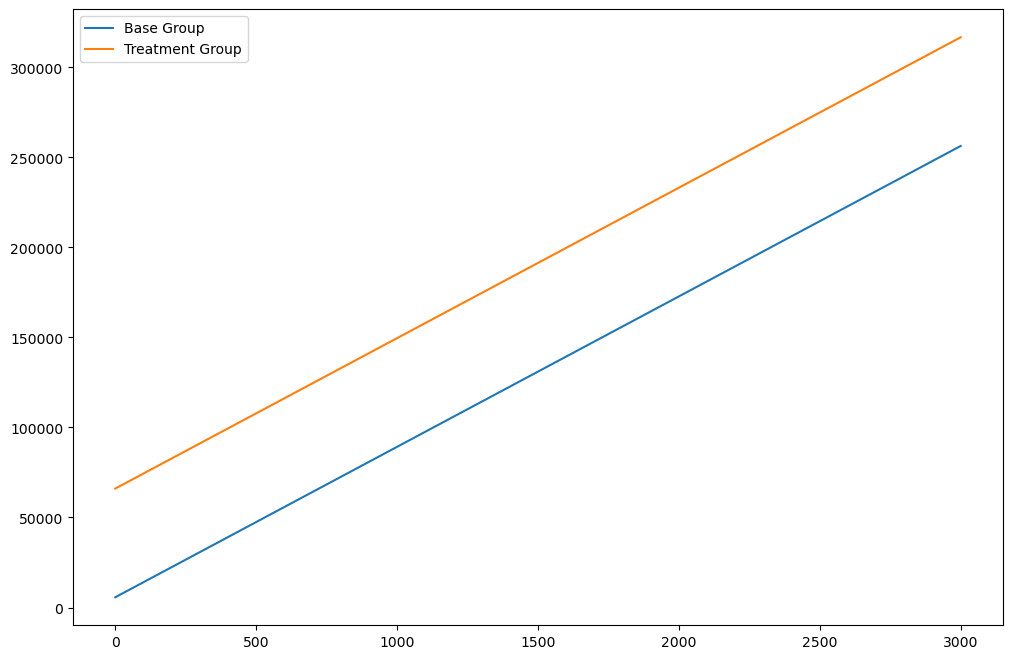

In [68]:
plt.figure(figsize = (12,8))
x = np.arange(0, 3001)
plt.plot(x, base_group.params[0] + base_group.params[1] * x, '-', label = 'Base Group')
plt.plot(x, (base_group.params[0] + base_group.params[2]) + base_group.params[1]*x,'-', label = 'Treatment Group')
plt.legend()
plt.show()

## Q1c.

${\beta}_{0}$ represents the estimated price of a home with zero square feet of area and is not near the university. As for ${\beta}_{1}$, the coefficient of square feet, there is a positive sign to it and is statistically significant, meaning that as square footage increases, so does price. As for ${\beta}_{2}$, it is the same as ${\beta}_{1}$, positive and statistically significant, indicating that as the home is near the university, the price increases.

## Question 2

## Q2a.

The base group is the group of homes not near the university.

## Q2b.

In [109]:
clo['Wtown'] = clo['utown'].replace({0: -1, 1:1})
clo['Wtown_sqft'] = clo['Wtown']*clo['sqft']
clo

,price,sqft,age,utown,pool,fplace,Wtown,Wtown_sqft
0,205452.0,2346.0,6,0,0,1,-1,-2346.0
1,185328.0,2003.0,5,0,0,1,-1,-2003.0
2,248422.0,2777.0,6,0,0,0,-1,-2777.0
3,154690.0,2017.0,1,0,0,0,-1,-2017.0
4,221801.0,2645.0,0,0,0,1,-1,-2645.0
...,...,...,...,...,...,...,...,...
995,257195.0,2284.0,4,1,0,0,1,2284.0
996,338295.0,3000.0,11,1,0,1,1,3000.0
997,263526.0,2399.0,6,1,0,0,1,2399.0
998,300728.0,2874.0,9,1,0,0,1,2874.0


In [110]:
eq2 = smf.ols('price ~ sqft + Wtown_sqft', data = clo).fit()
print(eq2.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.865     
Dependent Variable:  price            AIC:                22137.3457
Date:                2023-03-28 05:24 BIC:                22152.0690
No. Observations:    1000             Log-Likelihood:     -11066.   
Df Model:            2                F-statistic:        3205.     
Df Residuals:        997              Prob (F-statistic): 0.00      
R-squared:           0.865            Scale:              2.4008e+08
--------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  38177.4779 4264.3936  8.9526 0.0000 29809.2611 46545.6947
sqft          82.6100    1.6806 49.1549 0.0000    79.3120    85.9079
Wtown_sqft    11.9039    0.1933 61.5718 0.0000    11.5245    12.2832
-----------------------------------------------------

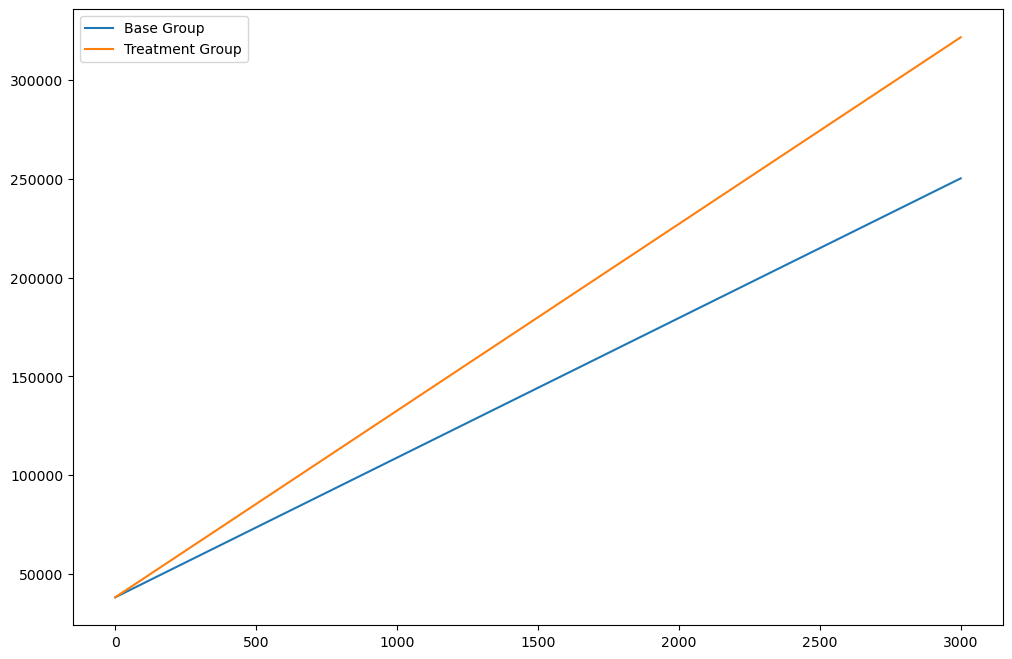

In [104]:
plt.figure(figsize = (12,8))
x = np.arange(0, 3001)
plt.plot(x, eq2.params[0] + eq2.params[1] * x, '-', label = 'Base Group')
plt.plot(x, eq2.params[0] + eq2.params[1]*x + eq2.params[2]*x,'-',label = 'Treatment Group')
plt.legend()
plt.show()

## Q2c.

${\beta}_{0}$ represents the estimated price of a home that is not near the university and does not have any square footage. As for ${\beta}_{1}$, it is considered positive and statistically significant, meaning that there is an effect of increasing square footage and increasing house prices. As for ${\beta}_{2}$, the interaction between the distance of a home near the university and square footage is positive and statistically significant, meaning that there is an effect of homes being near the university and having higher house prices than those that are far from the university.


# Question 3

In [111]:
eq3 = smf.ols('price ~ sqft + utown + Wtown_sqft', data = clo).fit()
print(eq3.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.866     
Dependent Variable:  price            AIC:                22128.4415
Date:                2023-03-28 05:24 BIC:                22148.0726
No. Observations:    1000             Log-Likelihood:     -11060.   
Df Model:            3                F-statistic:        2162.     
Df Residuals:        996              Prob (F-statistic): 0.00      
R-squared:           0.867            Scale:              2.3771e+08
--------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  23062.5081 6239.1853  3.6964 0.0002 10819.0514 35305.9648
sqft          83.0399    1.6774 49.5063 0.0000    79.7483    86.3315
utown      28123.5086 8510.5767  3.3045 0.0010 11422.7900 44824.2272
Wtown_sqft     6.3975    1.6774  3.8140 0.0001     3.

## Q3a.

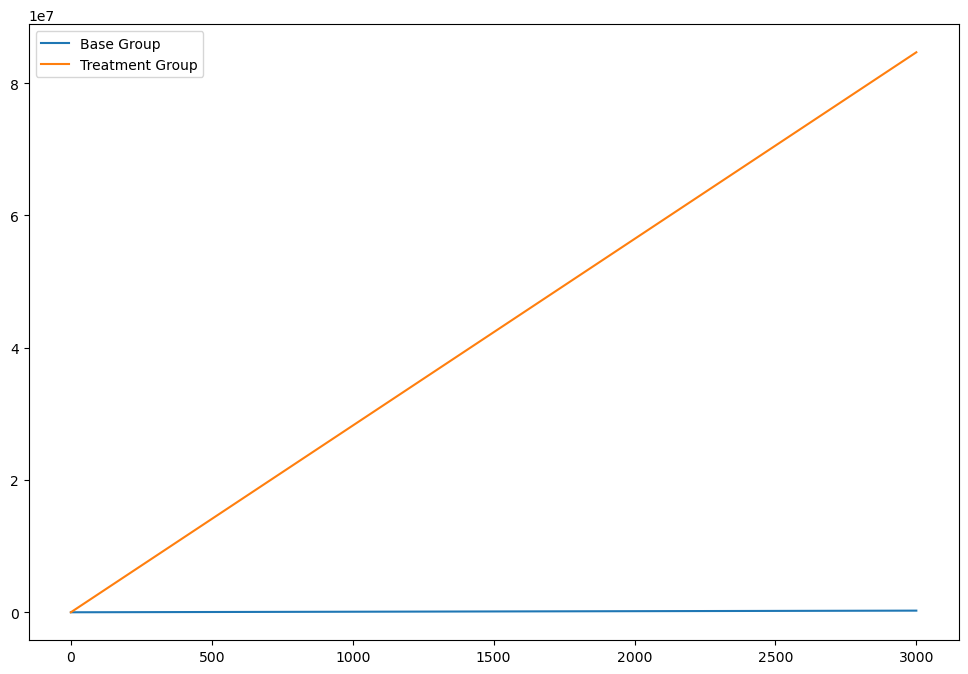

In [112]:
plt.figure(figsize = (12,8))
x = np.arange(0, 3001)
plt.plot(x, eq3.params[0] + eq3.params[1]*x, '-', label = 'Base Group')
plt.plot(x, eq3.params[0] + eq3.params[1]*x + eq3.params[2]*x + eq3.params[3]*x, '-', label = 'Treatment Group')
plt.legend()
plt.show()

## Q3b.

${\beta}_{0}$ is the same description as the previous question. As for ${\beta}_{1}$, it is positive and statistically significant, indicating that there is an effect of increasing square footage and increasing house prices. As for ${\beta}_{2}$, it is also positive and statistically significant, indicating that houses near the university are more likely to have higher prices than those far from the university. As for ${\beta}_{3}$, it is negative and statistically significant, indicating that there are differences in homes near the university and far from the university that do not follow the trend that square footage and utown variables do follow. However, it is small, indicating no practical significance in the interaction.

# Question 4

In [114]:
eq4 = smf.ols('price ~ sqft + utown + Wtown_sqft + age + pool + fplace', data = clo).fit()
print(eq4.summary2())

                  Results: Ordinary least squares
Model:               OLS              Adj. R-squared:     0.870     
Dependent Variable:  price            AIC:                22106.2685
Date:                2023-03-28 05:26 BIC:                22140.6228
No. Observations:    1000             Log-Likelihood:     -11046.   
Df Model:            6                F-statistic:        1113.     
Df Residuals:        993              Prob (F-statistic): 0.00      
R-squared:           0.871            Scale:              2.3181e+08
--------------------------------------------------------------------
             Coef.     Std.Err.    t    P>|t|    [0.025     0.975]  
--------------------------------------------------------------------
Intercept  24499.9849 6191.7214  3.9569 0.0001 12349.6242 36650.3456
sqft          82.6188    1.6661 49.5889 0.0000    79.3494    85.8882
utown      27452.9522 8422.5824  3.2594 0.0012 10924.8485 43981.0559
Wtown_sqft     6.4970    1.6602  3.9133 0.0001     3.

## Q4a.

In [117]:
from statsmodels.iolib.summary2 import summary_col

In [121]:
results_table = summary_col(results = [base_group, eq2, eq3, eq4],
                            float_format = '%0.2f', stars = True,
                            info_dict = {'No. observations' : lambda x: str(int(x.nobs))},
                            regressor_order = ['Intercept', 'Y', 'S'])
print(results_table.as_text())


                   price I     price II   price III   price IIII
----------------------------------------------------------------
Intercept        5680.86     38177.48*** 23062.51*** 24499.98***
                 (4290.15)   (4264.39)   (6239.19)   (6191.72)  
Wtown_sqft                   11.90***    6.40***     6.50***    
                             (0.19)      (1.68)      (1.66)     
age                                                  -190.09*** 
                                                     (51.20)    
fplace                                               1649.18*   
                                                     (971.96)   
pool                                                 4377.16*** 
                                                     (1196.69)  
sqft             83.56***    82.61***    83.04***    82.62***   
                 (1.68)      (1.68)      (1.68)      (1.67)     
utown            60369.03***             28123.51*** 27452.95***
                 (982.70

## Q4b.

All the coefficients are statistically significant and provide an effect towards price, mostly positive but age will have a negative effect on price. However, these coefficients provide more additional information to the variation of price, meaning that these variables do not change the interpretation of the original variables.

# Question 5

In [155]:
clo['lnprice'] = np.log(clo['price']) 
clo['lnsqft'] = np.log(clo['sqft'])
clo['lnage'] = np.log(clo['age'])
clo['lnutown'] = np.log(clo['utown'])
clo['lnpool'] = np.log(clo['pool'])
clo['lnfplace'] = np.log(clo['fplace'])
clo['lnWtown_sqft'] = np.log(clo['Wtown_sqft'])
np.seterr(all = 'ignore') 
clo.replace([np.inf, -np.inf], np.nan, inplace=True)
clo2 = clo.fillna(0)
clo2

,price,sqft,age,utown,pool,fplace,Wtown,Wtown_sqft,lnprice,lnsqft,lnage,lnpool,lnfplace,lnWtown_sqft,lnutown
0,205452.0,2346.0,6,0.0,0,1,-1,-2346.0,12.232968,7.760467,1.791759,0.0,0.0,0.000000,0.0
1,185328.0,2003.0,5,0.0,0,1,-1,-2003.0,12.129883,7.602401,1.609438,0.0,0.0,0.000000,0.0
2,248422.0,2777.0,6,0.0,0,0,-1,-2777.0,12.422884,7.929126,1.791759,0.0,0.0,0.000000,0.0
3,154690.0,2017.0,1,0.0,0,0,-1,-2017.0,11.949178,7.609367,0.000000,0.0,0.0,0.000000,0.0
4,221801.0,2645.0,0,0.0,0,1,-1,-2645.0,12.309536,7.880426,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,257195.0,2284.0,4,0.0,0,0,1,2284.0,12.457590,7.733684,1.386294,0.0,0.0,7.733684,0.0
996,338295.0,3000.0,11,0.0,0,1,1,3000.0,12.731674,8.006368,2.397895,0.0,0.0,8.006368,0.0
997,263526.0,2399.0,6,0.0,0,0,1,2399.0,12.481907,7.782807,1.791759,0.0,0.0,7.782807,0.0
998,300728.0,2874.0,9,0.0,0,0,1,2874.0,12.613961,7.963460,2.197225,0.0,0.0,7.963460,0.0


In [176]:
eq4_ln = smf.ols('lnprice ~ sqft + age + pool + utown + fplace + Wtown_sqft', data = clo2).fit()
print(eq4_ln.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.849     
Dependent Variable: lnprice          AIC:                -2544.8671
Date:               2023-03-28 06:28 BIC:                -2515.4205
No. Observations:   1000             Log-Likelihood:     1278.4    
Df Model:           5                F-statistic:        1126.     
Df Residuals:       994              Prob (F-statistic): 0.00      
R-squared:          0.850            Scale:              0.0045678 
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept      11.5502    0.0188  613.7393  0.0000  11.5133  11.5871
sqft            0.0003    0.0000   45.7201  0.0000   0.0003   0.0004
age            -0.0009    0.0002   -3.8827  0.0001  -0.0013  -0.0004
pool            0.0194    0.0053    3.6430  0.0003   0.0089 

## Q5a.

In [177]:
(np.exp(eq4_ln.params[3]) - 1) * 100

1.9540022127064072

On average, there is an association of homes with pools as a 0.0194% increase in prices. As for the exact value, it will be a 1.95% as well.

## Q5b.

In [178]:
eq4_ln.params[0] + eq4_ln.params[1] * 2500 + eq4_ln.params[4] * 1 + eq4_ln.params[6] * 2500

12.512954599582741

In [179]:
eq4_ln.params[0] + eq4_ln.params[1] * 2500 + (eq4_ln.params[4] * 0) + eq4_ln.params[6] * 2500

12.512954599582741

There is no difference.

# Question 6

In [163]:
results_table2 = summary_col(results = [base_group, eq2, eq3, eq4, eq4_ln],
                            float_format = '%0.2f', stars = True,
                            info_dict = {'No. observations' : lambda x: str(int(x.nobs))},
                            regressor_order = ['Intercept', 'Y', 'S'])
print(results_table2.as_text())


                   price I     price II   price III   price IIII lnprice I
--------------------------------------------------------------------------
Intercept        5680.86     38177.48*** 23062.51*** 24499.98*** 5.76***  
                 (4290.15)   (4264.39)   (6239.19)   (6191.72)   (0.14)   
Wtown_sqft                   11.90***    6.40***     6.50***              
                             (0.19)      (1.68)      (1.66)               
age                                                  -190.09***           
                                                     (51.20)              
fplace                                               1649.18*             
                                                     (971.96)             
lnWtown_sqft                                                     0.03***  
                                                                 (0.00)   
lnage                                                            -0.01*** 
                        

# Question 7

In [191]:
link2 = 'https://raw.githubusercontent.com/AlR0d/courses/main/4421/beauty.csv'
bea = pd.read_csv(link2)
bea

,year,wage,belavg,abavg,avg,exper,looks,union,goodhealth,black,female,marries,south,bigcity,smllcity,service,edu
0,1977,5.73,0,1,0,30,4,0,1,0,1,1,0,0,1,1,14
1,1977,4.28,0,0,1,28,3,0,1,0,1,1,1,0,1,0,12
2,1977,7.96,0,1,0,35,4,0,1,0,1,0,0,0,1,0,10
3,1977,11.57,0,0,1,38,3,0,1,0,0,1,0,1,0,1,16
4,1977,11.42,0,0,1,27,3,0,1,0,0,1,0,0,1,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1977,1.61,0,0,1,25,3,0,1,1,1,0,0,0,0,1,12
1256,1977,1.68,1,0,0,4,2,0,1,0,1,1,0,0,1,1,12
1257,1977,3.29,0,0,1,35,3,0,1,1,1,0,0,0,1,1,12
1258,1977,2.31,0,0,1,15,3,0,1,1,1,1,0,1,0,1,10


In [167]:
bea['belavg'].value_counts()

0    1105
1     155
Name: belavg, dtype: int64

In [169]:
bea['abavg'].value_counts()

0    877
1    383
Name: abavg, dtype: int64

People are more rated as having above average looks.

# Question 8

In [192]:
bea[bea['female'] == 0].value_counts(bea['abavg'] == 1)

abavg
False    585
True     239
dtype: int64

Approximately 29% of men are reported to having above average looks.

# Question 9

In [175]:
bea[bea['female'] == 1].value_counts(bea['abavg'] == 1)

abavg
False    292
True     144
dtype: int64

Approximately 33% of women are reported to having above average looks.

# Question 10

The base group is the group of people who are reported as having average looks.

# Question 11

In [210]:
bea['lnwage'] = np.log(bea['wage'])
eq5 = smf.ols('lnwage ~ belavg + abavg', data = bea).fit()
print(eq5.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.011    
Dependent Variable: lnwage           AIC:                2254.3633
Date:               2023-03-28 06:49 BIC:                2269.7799
No. Observations:   1260             Log-Likelihood:     -1124.2  
Df Model:           2                F-statistic:        7.985    
Df Residuals:       1257             Prob (F-statistic): 0.000358 
R-squared:          0.013            Scale:              0.34956  
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       1.6983    0.0220  77.1828  0.0000   1.6551   1.7415
belavg         -0.2088    0.0523  -3.9892  0.0001  -0.3115  -0.1061
abavg          -0.0454    0.0374  -1.2157  0.2243  -0.1188   0.0279
------------------------------------------------------------------
Omnibus

For the log form of wage, it is an estimation of the base group. For the other two coefficients, they are negative and statistically significant, indicating that there is an effect between looks and wages possibly decreasing.

# Question 12

In [203]:
bea['gender'] = bea['female'].replace({'Male': 0, 'Women':1})
bea
bea = pd.concat([bea, dummy_vars], axis=1)
bea

,year,wage,belavg,abavg,avg,exper,looks,union,goodhealth,black,...,south,bigcity,smllcity,service,edu,gender,Far,Near,Far,Near
0,1977,5.73,0,1,0,30,4,0,1,0,...,0,0,1,1,14,1,0.0,1.0,0.0,1.0
1,1977,4.28,0,0,1,28,3,0,1,0,...,1,0,1,0,12,1,0.0,1.0,0.0,1.0
2,1977,7.96,0,1,0,35,4,0,1,0,...,0,0,1,0,10,1,0.0,1.0,0.0,1.0
3,1977,11.57,0,0,1,38,3,0,1,0,...,0,1,0,1,16,0,0.0,1.0,0.0,1.0
4,1977,11.42,0,0,1,27,3,0,1,0,...,0,0,1,0,16,0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,1977,1.61,0,0,1,25,3,0,1,1,...,0,0,0,1,12,1,NaN,NaN,NaN,NaN
1256,1977,1.68,1,0,0,4,2,0,1,0,...,0,0,1,1,12,1,NaN,NaN,NaN,NaN
1257,1977,3.29,0,0,1,35,3,0,1,1,...,0,0,1,1,12,1,NaN,NaN,NaN,NaN
1258,1977,2.31,0,0,1,15,3,0,1,1,...,0,1,0,1,10,1,NaN,NaN,NaN,NaN


In [205]:
eq6 = smf.ols('wage ~ belavg + Near', data = bea).fit()
print(eq6.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.040    
Dependent Variable: wage             AIC:                5952.2601
Date:               2023-03-28 06:46 BIC:                5966.9834
No. Observations:   1000             Log-Likelihood:     -2973.1  
Df Model:           2                F-statistic:        21.97    
Df Residuals:       997              Prob (F-statistic): 4.59e-10 
R-squared:          0.042            Scale:              22.452   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       5.9088    0.2162  27.3354  0.0000   5.4846   6.3330
belavg         -1.1660    0.4699  -2.4811  0.0133  -2.0882  -0.2438
Near[0]         0.9094    0.1500   6.0612  0.0000   0.6150   1.2038
Near[1]         0.9094    0.1500   6.0612  0.0000   0.6150   1.2038
------

# Question 13

In [206]:
eq7 = smf.ols('wage ~ belavg + Far', data = bea).fit()
print(eq7.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.040    
Dependent Variable: wage             AIC:                5952.2601
Date:               2023-03-28 06:47 BIC:                5966.9834
No. Observations:   1000             Log-Likelihood:     -2973.1  
Df Model:           2                F-statistic:        21.97    
Df Residuals:       997              Prob (F-statistic): 4.59e-10 
R-squared:          0.042            Scale:              22.452   
-------------------------------------------------------------------
                Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept       7.7275    0.2215  34.8864  0.0000   7.2929   8.1622
belavg         -1.1660    0.4699  -2.4811  0.0133  -2.0882  -0.2438
Far[0]         -0.9094    0.1500  -6.0612  0.0000  -1.2038  -0.6150
Far[1]         -0.9094    0.1500  -6.0612  0.0000  -1.2038  -0.6150
------

# Question 14

In [208]:
bea['female_abavg'] = bea['female'] * bea['abavg']
bea['female_belavg'] = bea['female'] * bea['belavg']

In [212]:
eq8 = smf.ols('lnwage ~ belavg + abavg + female + female_abavg + female_belavg', data = bea).fit() 
print(eq8.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.198    
Dependent Variable: lnwage           AIC:                1992.7790
Date:               2023-03-28 06:49 BIC:                2023.6122
No. Observations:   1260             Log-Likelihood:     -990.39  
Df Model:           5                F-statistic:        63.28    
Df Residuals:       1254             Prob (F-statistic): 5.86e-59 
R-squared:          0.201            Scale:              0.28335  
------------------------------------------------------------------
                   Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------
Intercept          1.8839   0.0241  78.2603 0.0000  1.8366  1.9311
belavg            -0.1987   0.0594  -3.3445 0.0008 -0.3153 -0.0822
abavg             -0.0440   0.0420  -1.0473 0.2952 -0.1264  0.0384
female            -0.5751   0.0424 -13.5710 0.0000 -0.6582 -0.4919
female_abavg 